# Data analisys on Covid-19 

The basic idea here is following the trends of hospedalized cases, as they seems to be the more reliable data available today

In [229]:
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as pyplot
import glob
import numpy as np
from scipy import optimize

path = "COVID-19/dati-regioni"
all_files = glob.glob(path + "/*.csv")

datasets = []

for filename in all_files:
    data = pd.read_csv(filename)
    data['data'] = pd.to_datetime(data['data']).dt.normalize()
    valid_cases = data['totale_ospedalizzati'] + data['dimessi_guariti'] + data['deceduti']
    data['totali_accertati'] = valid_cases
    datasets.append(data)

df_italy =  pd.concat(datasets, axis=0, ignore_index=True)
df_italy = df_italy[['data','denominazione_regione', 'ricoverati_con_sintomi','terapia_intensiva','dimessi_guariti','deceduti','totali_accertati']]
df_italy = df_italy.sort_values(by=['data'])

display(df_italy.info())
display(df_italy.head())
#display(data[['codice_regione', 'denominazione_regione']])valid_cases = data['totale_ospedalizzati'] + data['dimessi_guariti'] + data['deceduti']
%matplotlib inline

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 209 to 0
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   data                    1449 non-null   datetime64[ns]
 1   denominazione_regione   1449 non-null   object        
 2   ricoverati_con_sintomi  1449 non-null   int64         
 3   terapia_intensiva       1449 non-null   int64         
 4   dimessi_guariti         1449 non-null   int64         
 5   deceduti                1449 non-null   int64         
 6   totali_accertati        1449 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 90.6+ KB


None

,data,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,dimessi_guariti,deceduti,totali_accertati
209,2020-02-24,Veneto,12,4,0,1,17
191,2020-02-24,P.A. Bolzano,0,0,0,0,0
192,2020-02-24,Calabria,0,0,0,0,0
193,2020-02-24,Campania,0,0,0,0,0
194,2020-02-24,Emilia Romagna,10,2,0,0,12


In [230]:
def sigmoid(p,x):
    x0,y0,c,k=p
    y = c / (1 + np.exp(-k*(x-x0))) + y0
    return y
 
def residuals(p,x,y):
    return y - sigmoid(p,x)
 

count all the cases that needs hospitalization for a sig

In [257]:
pd.set_option('mode.chained_assignment', None)
def plot_region(region_name):
    final = df_italy.copy()
    region = final[final['denominazione_regione']==region_name]
    region.drop_duplicates(subset='data',inplace=True)
    region['day'] = range(1,len(region)+1)
    x = region['day'].tolist()
    y = region['totali_accertati'].tolist() #.diff() in order to have deltas
    y[0] = 0.0
    pyplot.figure(figsize=[13.0,8.0])
    pyplot.grid(b=True, color='g')
    pyplot.plot(x,y,'g-.', alpha=0.1)
    z = np.polyfit(x, y, 3)
    y1 = np.polyval(np.poly1d(z),x);
    pyplot.plot(x,y1, alpha=0.3)
    style = [('-',0.3)]*len(x)
    style[len(x)-1] = ('*-.',1)
    for n in range(len(x)-5,len(x)):
        x0 = x[0:n]
        y0 = y[0:n]
        x_f = x0.copy()
        x_f.extend(range(len(x),len(x)+20))
        p, cov, infodict, mesg, ier = optimize.leastsq(residuals,[0,0,0,0],args=(x0,np.array(y0)),full_output=1)
        x1,y1,c,k=p
        pyplot.plot(x_f, c / (1 + np.exp(-k*((x_f)-x1))) + y1,style[n][0], alpha=style[n][1])


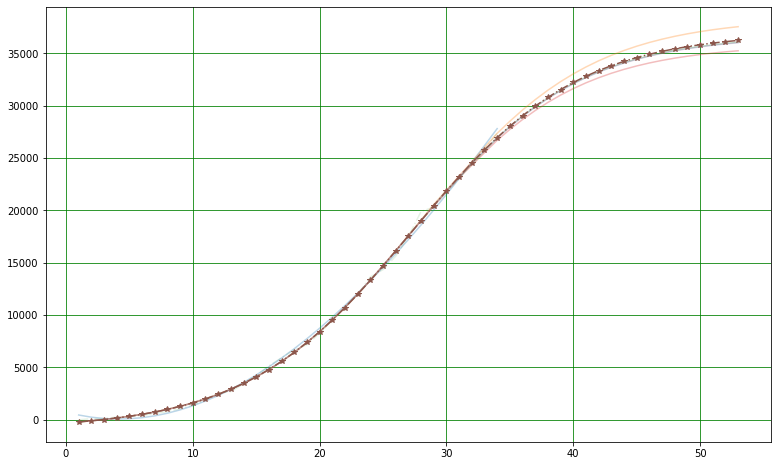

In [258]:
plot_region('Lombardia')

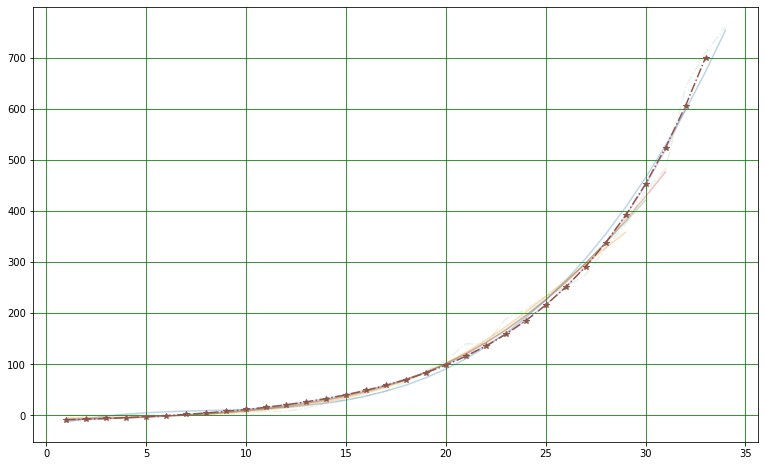

In [242]:
plot_region("Puglia")

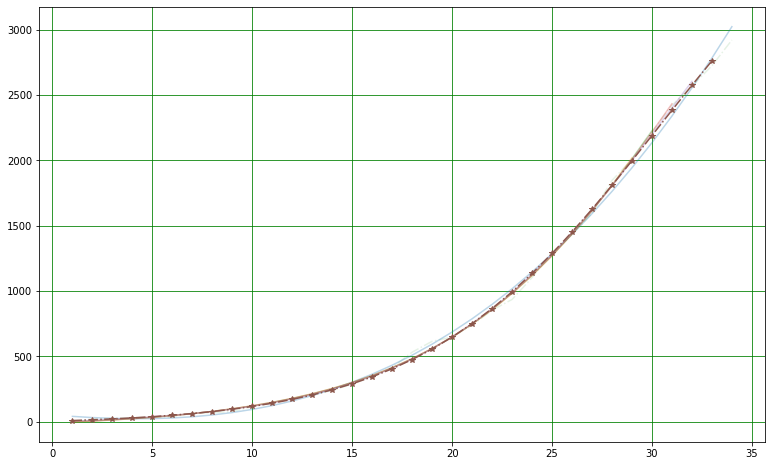

In [243]:
plot_region("Veneto")

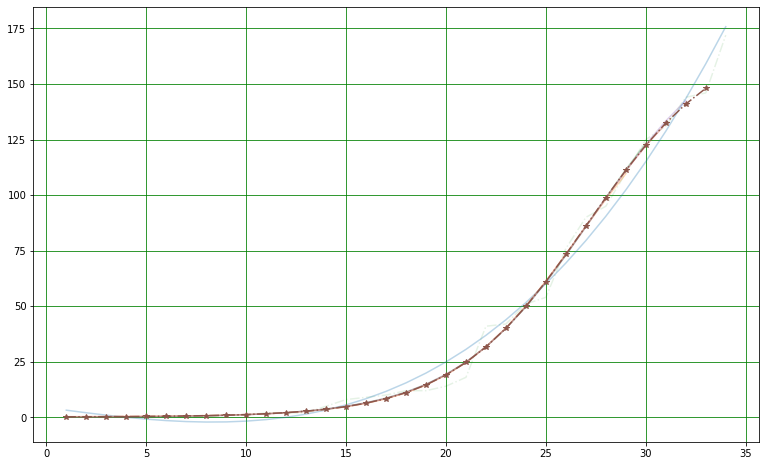

In [244]:
plot_region("Sardegna")